# Procesi v analitiki podatkov

## Designing Machine Learning Workflows

### Feature engineering

In [11]:
import pandas as pd
import numpy as np

In [12]:
credit = pd.read_csv('data/credit.csv')

In [13]:
non_numeric_columns = ['checking_status',
                     'credit_history',
                     'purpose',
                     'savings_status',
                     'employment',
                     'personal_status',
                     'other_parties',
                     'property_magnitude',
                     'other_payment_plans',
                     'housing',
                     'job',
                     'own_telephone',
                     'foreign_worker']

In [14]:
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',buy_radio_tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',buy_radio_tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',buy_furniture_equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously',buy_new_car,4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [15]:
#napoved ali bo kredit odobren ali ne

In [16]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

In [ ]:
#spremenimo podatke v številke npr. zaposlitev več kot 7 damo 1 in tako naprej - zakodiramo, spodaj nam LabelEncoder to naredi

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
for column in non_numeric_columns:
    le = LabelEncoder()
    credit[column] = le.fit_transform(credit[column])

In [19]:
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,4,1169,4,3,4,3,2,...,2,67,1,1,2,3,1,1,1,good
1,0,48,3,4,5951,2,0,2,0,2,...,2,22,1,1,1,3,1,0,1,bad
2,3,12,1,6,2096,2,1,2,3,2,...,2,49,1,1,1,2,2,0,1,good
3,1,42,3,2,7882,2,1,2,3,1,...,0,45,1,0,1,3,2,0,1,good
4,1,24,2,3,4870,2,0,3,3,2,...,1,53,1,0,2,3,2,0,1,bad


In [21]:
credit.dtypes

checking_status            int64
duration                   int64
credit_history             int64
purpose                    int64
credit_amount              int64
savings_status             int64
employment                 int64
installment_commitment     int64
personal_status            int64
other_parties              int64
residence_since            int64
property_magnitude         int64
age                        int64
other_payment_plans        int64
housing                    int64
existing_credits           int64
job                        int64
num_dependents             int64
own_telephone              int64
foreign_worker             int64
class                     object
dtype: object

In [22]:
def feature_engineering(data, non_numeric_columns=None):
    for column in non_numeric_columns:
        le = LabelEncoder()
        credit[column] = le.fit_transform(credit[column])
    
    return data
    

In [23]:
credit = pd.read_csv('data/credit.csv')
credit = feature_engineering(credit, non_numeric_columns)

### Model selection

In [ ]:
#razdelimo na test in training del

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,4,1169,4,3,4,3,2,...,2,67,1,1,2,3,1,1,1,good
1,0,48,3,4,5951,2,0,2,0,2,...,2,22,1,1,1,3,1,0,1,bad
2,3,12,1,6,2096,2,1,2,3,2,...,2,49,1,1,1,2,2,0,1,good
3,1,42,3,2,7882,2,1,2,3,1,...,0,45,1,0,1,3,2,0,1,good
4,1,24,2,3,4870,2,0,3,3,2,...,1,53,1,0,2,3,2,0,1,bad


In [26]:
X = credit.drop('class', 1)
y = credit['class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #vedno isto, da imamo

In [29]:
X_train.shape

(800, 20)

In [30]:
X_test.shape

(200, 20)

In [31]:
y_train.shape

(800,)

In [32]:
y_test.shape

(200,)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
#init
rf_model = RandomForestClassifier(random_state=2, n_estimators=10)
#fit
rf_model.fit(X_train, y_train)
#predict
rf_prediction = rf_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy = accuracy_score(y_test, rf_prediction)*100  #y_test so dejanske vr. rf_prediction naša napoved

In [41]:
print(f'Accuracy in {accuracy}%.')

Accuracy in 74.0%.


In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
abc_model = AdaBoostClassifier(random_state=2)
abc_model.fit(X_train, y_train)
abc_prediction = abc_model.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, abc_prediction)*100 

In [45]:
print(f'Accuracy in {accuracy}%.')

Accuracy in 75.0%.


You have just built your first pipeline. Did you wonder whether there are any additional parameters that you could tune to make AdaBoost even better? The answer is yes! Let's explore that in our next lesson on tuning parameters.

<img src="images/Screenshot from 2019-11-18 16-18-27.png">

### Grid search CV for model complexity

Define the parameter grid as described in the code comment and create a grid object with a RandomForestClassifier().

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Set a range for n_estimators from 10 to 40 in steps of 10, več dreves večje ujemanje
param_grid = {'n_estimators': range(10, 50, 10)}  #list parametrov 10,20,30,40

# spodaj grid (vrsta modela, katere parametre testiramo, crossvalidation - na tri dele)
grid = GridSearchCV(RandomForestClassifier(random_state=2), param_grid, cv=3)
grid_model_result = grid.fit(X,y) # samo razdeli na train in test

In [49]:
best_score = grid_model_result.best_score_
best_params = grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.759000 using {'n_estimators': 40}


In [71]:

rf_model = RandomForestClassifier(random_state=2, n_estimators=10)
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_prediction)*100 
print(f'Accuracy in {accuracy}%.')

Accuracy in 74.0%.


Adapt your code to optimise n_estimators for an AdaBoostClassifier().

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
# Define a grid for n_estimators ranging from 1 to 10
param_grid = {'n_estimators': range(1, 11)}

grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=3)
grid_model_result = grid.fit(X,y) 
best_score = grid_model_result.best_score_
best_params = grid_model_result.best_params_

print("Best: %f using %s" % (best_score, best_params))

Best: 0.736000 using {'n_estimators': 10}


Adapt your code to optimise n_neighbors for an KNeighborsClassifier().

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
# Define a grid for n_neighbors with values 10, 50 and 100
param_grid = {'n_neighbors': [10, 50, 100]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
grid_model_result = grid.fit(X,y) 
best_score = grid_model_result.best_score_
best_params = grid_model_result.best_params_


print("Best: %f using %s" % (best_score, best_params))

Best: 0.704000 using {'n_neighbors': 50}


### Categorical encodings

In [56]:
credit = pd.read_csv('data/credit.csv')

non_numeric_columns = ['checking_status',
                     'purpose',
                     'savings_status',
                     'employment',
                     'personal_status',
                     'other_parties',
                     'property_magnitude',
                     'other_payment_plans',
                     'housing',
                     'job',
                     'own_telephone',
                     'foreign_worker']

credit = feature_engineering(credit, non_numeric_columns)

X = credit.drop(['class', 'credit_history'], 1)

In [57]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null int64
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null int64
credit_amount             1000 non-null int64
savings_status            1000 non-null int64
employment                1000 non-null int64
installment_commitment    1000 non-null int64
personal_status           1000 non-null int64
other_parties             1000 non-null int64
residence_since           1000 non-null int64
property_magnitude        1000 non-null int64
age                       1000 non-null int64
other_payment_plans       1000 non-null int64
housing                   1000 non-null int64
existing_credits          1000 non-null int64
job                       1000 non-null int64
num_dependents            1000 non-null int64
own_telephone             1000 non-null int64
foreign_worker     

In [58]:
le = LabelEncoder()
credit_history_num = le.fit_transform(credit['credit_history'])

In [59]:
X_num = pd.concat([X, pd.Series(credit_history_num)], axis = 1)

In [60]:
X_num.head() #dodamo stolpec z O označen in dodan z label

,checking_status,duration,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,0
0,1,6,4,1169,4,3,4,3,2,4,2,67,1,1,2,3,1,1,1,1
1,0,48,4,5951,2,0,2,0,2,2,2,22,1,1,1,3,1,0,1,3
2,3,12,6,2096,2,1,2,3,2,3,2,49,1,1,1,2,2,0,1,1
3,1,42,2,7882,2,1,2,3,1,4,0,45,1,0,1,3,2,0,1,3
4,1,24,3,4870,2,0,3,3,2,4,1,53,1,0,2,3,2,0,1,2


In [61]:
X_hot = pd.concat([X, pd.get_dummies(credit['credit_history'])], axis = 1)

In [62]:
X_hot.head()

,checking_status,duration,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,...,existing_credits,job,num_dependents,own_telephone,foreign_worker,'all paid','critical/other existing credit','delayed previously','existing paid','no credits/all paid'
0,1,6,4,1169,4,3,4,3,2,4,...,2,3,1,1,1,0,1,0,0,0
1,0,48,4,5951,2,0,2,0,2,2,...,1,3,1,0,1,0,0,0,1,0
2,3,12,6,2096,2,1,2,3,2,3,...,1,2,2,0,1,0,1,0,0,0
3,1,42,2,7882,2,1,2,3,1,4,...,1,3,2,0,1,0,0,0,1,0
4,1,24,3,4870,2,0,3,3,2,4,...,2,3,2,0,1,0,0,1,0,0


In [63]:
X_hot.shape

(1000, 24)

In [64]:
X_num.shape

(1000, 20)

In [ ]:
#stestiramo enkrat s hot drugič z num

In [65]:
#X_hot
X_hot_train, X_hot_test, y_train, y_test = train_test_split(X_hot, y, test_size=0.2, random_state=1)

In [66]:
#X_num
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=1)

In [69]:
# X_num
rf_model = RandomForestClassifier(n_estimators=40)
rf_model.fit(X_num_train, y_train)
rf_prediction = rf_model.predict(X_num_test)
accuracy = accuracy_score(y_test, rf_prediction)*100 
print(f'Accuracy in {accuracy}%.')

Accuracy in 77.0%.


In [73]:
# X_hot
rf_model = RandomForestClassifier(n_estimators=10)
rf_model.fit(X_hot_train, y_train)
rf_prediction = rf_model.predict(X_hot_test)
accuracy = accuracy_score(y_test, rf_prediction)*100 
print(f'Accuracy in {accuracy}%.')

Accuracy in 73.0%.


### Feature transformations

In [74]:
from sklearn.feature_selection import chi2, SelectKBest

In [75]:
import numpy as np

In [76]:
def abs_diff(x):
    return np.abs(x-np.mean(x))

In [77]:
credit['diff'] = abs_diff(credit['credit_amount'])

In [78]:
credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,diff
0,1,6,'critical/other existing credit',4,1169,4,3,4,3,2,...,67,1,1,2,3,1,1,1,good,2102.258
1,0,48,'existing paid',4,5951,2,0,2,0,2,...,22,1,1,1,3,1,0,1,bad,2679.742
2,3,12,'critical/other existing credit',6,2096,2,1,2,3,2,...,49,1,1,1,2,2,0,1,good,1175.258
3,1,42,'existing paid',2,7882,2,1,2,3,1,...,45,1,0,1,3,2,0,1,good,4610.742
4,1,24,'delayed previously',3,4870,2,0,3,3,2,...,53,1,0,2,3,2,0,1,bad,1598.742
5,3,36,'existing paid',6,9055,4,0,2,3,2,...,35,1,0,1,2,2,1,1,good,5783.742
6,3,24,'existing paid',2,2835,1,3,3,3,2,...,53,1,1,1,3,1,0,1,good,436.258
7,0,36,'existing paid',5,6948,2,0,2,3,2,...,35,1,2,1,0,1,1,1,good,3676.742
8,3,12,'existing paid',4,3059,3,1,2,1,2,...,61,1,1,1,2,1,0,1,good,212.258
9,0,30,'critical/other existing credit',3,5234,2,4,4,2,2,...,28,1,1,2,0,1,0,1,bad,1962.742


In [ ]:
#ali uporabimo navaden amount ali diff

In [79]:
sk = SelectKBest(chi2, k=1)

In [80]:
sk.fit(credit[['credit_amount', 'diff']], credit['class'])

SelectKBest(k=1, score_func=<function chi2 at 0x7f484c17e598>)

In [81]:
selected = sk.get_support()

In [82]:
X_selected = credit[['credit_amount', 'diff']]

In [83]:
X_selected.columns[selected]

Index(['credit_amount'], dtype='object')

### Bringing it all together

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [86]:
arrh = pd.read_csv('data/arrh.csv')

In [87]:
arrh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(120), int64(160)
memory usage: 988.8 KB


In [88]:
arrh.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,0
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,0
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,0
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,0


In [89]:
X = arrh.drop('class', 1)

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

In [93]:
X = rescaledX
y = arrh['class']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [95]:
grid_search = GridSearchCV(rfc(random_state=1), param_grid={'max_depth': [2,5,10]})

In [98]:
best_value = grid_search.fit(X_train, y_train).best_params_['max_depth'] #po .best_params dodamo, dobimo cifro

In [99]:
best_value

10

In [100]:
#model za dobljene vrednosti

clf = rfc(random_state=1, max_depth=best_value).fit(X_train, y_train)

In [101]:
vt = SelectKBest(chi2, k=100).fit(X_train, y_train)

In [103]:
X_train_reduced = vt.transform (X_train) #vzame tist 100, ki je bilo true
X_test_reduced = vt.transform (X_test)

In [104]:
clf = rfc(random_state=1, max_depth=best_value).fit(X_train_reduced, y_train)

In [105]:
prediction = clf.predict(X_test_reduced)

In [106]:
accuracy_score(y_test, prediction)*100

79.64601769911505

## Exploring the Bitcoin Cryptocurrency Market

### Bitcoin. Cryptocurrencies.

In [154]:
# Importing pandas
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

#current = pd.read_json("https://api.coinmarketcap.com/v1/ticker/")


#current.head()

### Full dataset, filtering, and reproducibility

In [155]:
dec6 = pd.read_csv('data/coinmarketcap_06122017.csv')

dec6.head()


,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [156]:
market_cap_raw = dec6[['id', 'market_cap_usd']]

market_cap_raw.count()

# manjk. vrednosti so zraven count

id                1326
market_cap_usd    1031
dtype: int64

In [157]:
market_cap_raw.head()

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09


In [158]:
market_cap_raw.tail()

,id,market_cap_usd
1321,turbocoin,NaN
1322,birds,NaN
1323,bitcoincashscrypt,NaN
1324,swisscoin,NaN
1325,faceblock,NaN


In [ ]:
#spodaj odstrani manjk. vrednosti

### Discard the cryptocurrencies without a market capitalization

In [159]:
cap = market_cap_raw.dropna()

In [160]:
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

### How big is Bitcoin compared with the rest of the cryptocurrencies?

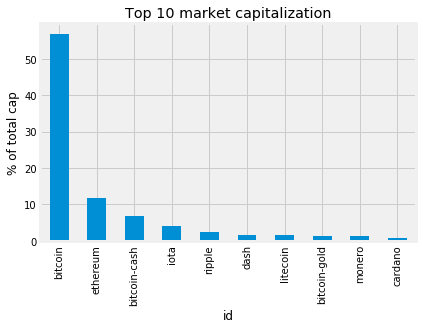

In [161]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

cap10 = cap.head(10).copy()
cap10 = cap10.set_index('id', drop = False)

cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()*100))

ax = cap10.plot.bar(x='id', y='market_cap_perc', title = TOP_CAP_TITLE, legend = False)
ax.set_ylabel(TOP_CAP_YLABEL)
plt.show()

### Making the plot easier to read and more informative

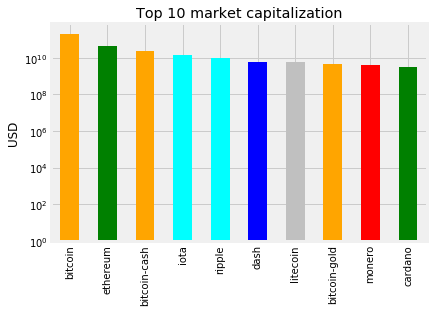

In [163]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'


ax = cap10.plot.bar(x='id', 
                    y='market_cap_usd', 
                    title = TOP_CAP_TITLE, 
                    colors = COLORS,
                    log = True,
                    legend = False)

ax.set_ylabel('USD')

ax.set_xlabel('')
plt.show()

### What is going on?! Volatility in cryptocurrencies

In [165]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']].copy()

volatility = volatility.set_index('id')
volatility.dropna(inplace=True)
                            
volatility = volatility.sort_values('percent_change_24h', ascending=True)
volatility.head()
volatility.tail()

,percent_change_24h,percent_change_7d
id,,
eaglecoin,272.50,114.73
beatcoin,295.49,132.79
bitzeny,416.04,3360.71
cashcoin,457.86,374.30
fedoracoin,833.01,92.10


### Well, we can already see that things are a bit crazy

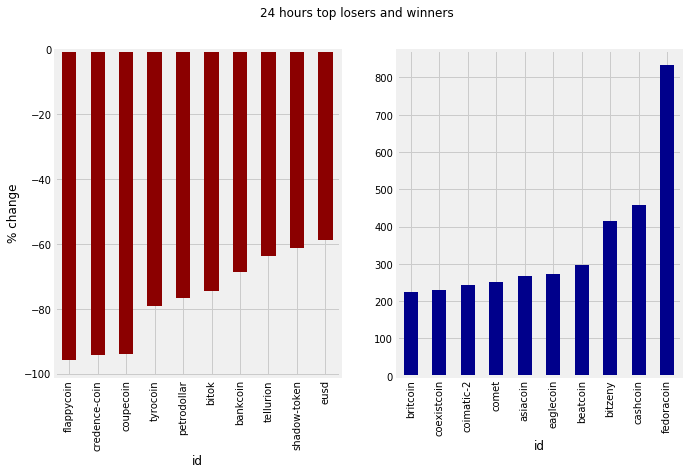

In [166]:
def top10_subplot(volatility_series, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    ax = (volatility_series[:10].plot.bar(color='darkred', ax=axes[0]))

    fig.suptitle(title)

    ax.set_ylabel('% change')

    ax = (volatility_series[-10:].plot.bar(color='darkblue', ax=axes[1]))
    

    return fig, ax

DTITLE = "24 hours top losers and winners"
 
fig, ax = top10_subplot(volatility['percent_change_24h'], DTITLE)
plt.show()

### Ok, those are... interesting. Let's check the weekly Series too.

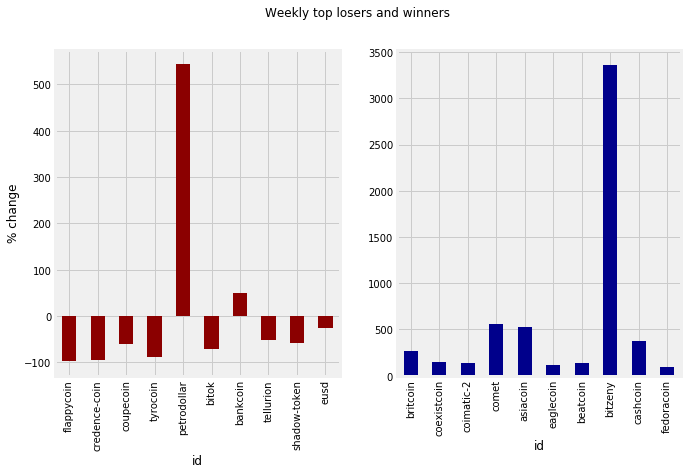

In [167]:
# Sorting in ascending order
volatility7d = volatility.sort_values('percent_change_7d', ascending=True)

WTITLE = "Weekly top losers and winners"


fig, ax = top10_subplot(volatility['percent_change_7d'], WTITLE)
plt.show()

### How small is small?

In [168]:
largecaps = cap.query('market_cap_usd > 10_000_000_000')
largecaps.head()

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


### Most coins are tiny

These are the market cap definitions from Investopedia:
- Large cap: +10 billion
- Mid cap: 2 billion - 10 billion
- Small cap: 300 million - 2 billion
- Micro cap: 50 million - 300 million
- Nano cap: Below 50 million

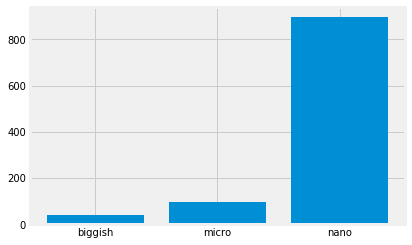

In [169]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
#billion - miljarda
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd>300000000')

# Same as above for micro ...
micro = capcount('market_cap_usd>50000000 & market_cap_usd<300000000')

# ... and for nano
nano =  capcount('market_cap_usd<50000000')

# Making a list with the 3 counts
values = [biggish,micro, nano]

# Plotting them with matplotlib 
# ... YOUR CODE FOR TASK 10 ...
plt.bar(range(len(values)), values, tick_label=LABELS)
plt.show()

## Predicting Credit Card Approvals

### Credit card applications

In [107]:
import pandas as pd

# Load dataset
cc_apps = pd.read_csv('data/cc_approvals.data', header=None)


cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Inspecting the applications

In [109]:
cc_apps.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [110]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [ ]:
#manjkajoče vrednosti so označene s ?

### Handling the missing values (part i)

In [111]:
cc_apps.loc[cc_apps[13].isin(['?'])]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
270,b,37.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,?,0,-
330,b,20.42,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,-
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,?,18,-
445,a,?,11.250,u,g,ff,ff,0.000,f,f,0,f,g,?,5200,-
456,b,34.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,-


In [116]:
cc_apps = cc_apps.replace('?', np.nan)

In [117]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     678 non-null object
1     678 non-null float64
2     690 non-null float64
3     684 non-null object
4     684 non-null object
5     681 non-null object
6     681 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    677 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 86.3+ KB


In [118]:
cc_apps[1] = cc_apps[1].astype('float')

In [119]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     678 non-null object
1     678 non-null float64
2     690 non-null float64
3     684 non-null object
4     684 non-null object
5     681 non-null object
6     681 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    677 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 86.3+ KB


In [ ]:
#po stolpcu število manjkajočih vrednosti

In [120]:
cc_apps.isnull().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

### Handling the missing values (part ii)

In [121]:
#zapolni s povprečno vrednostjo ostalih
cc_apps.fillna(cc_apps.mean(), inplace=True)

In [122]:
cc_apps.isnull().sum()

0     12
1      0
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

### Handling the missing values (part iii)

In [ ]:
#najbolj pogoste  vrednosti

In [124]:
for col in cc_apps:
    if cc_apps[col].dtypes == 'object': #samo stringe, ostali pretvorjeni že
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

In [125]:
cc_apps.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [123]:
#cc_apps[4].value_counts().index[0]

'g'

In [ ]:
#sedaj smo se rešili manjk. vrednosti

### Preprocessing the data (part i)

In [ ]:
#pretvorimo podatke object v število

In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
le = LabelEncoder()

In [140]:
for col in cc_apps:
    if cc_apps[col].dtypes == 'object':
        cc_apps[col] = le.fit_transform(cc_apps[col])

In [141]:
cc_apps.head()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,0,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,0,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,1,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,1,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


### Splitting the dataset into train and test sets

In [142]:
from sklearn.model_selection import train_test_split

cc_apps = cc_apps.drop([11,13], axis=1)
cc_apps = cc_apps.values #se ne rabi ukvarjat s pandas

In [143]:
X = cc_apps[:, 0:13]
y = cc_apps[:, 13]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Preprocessing the data (part ii)

In [145]:
#normaliziramo
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

### Fitting a logistic regression model to the train set

In [146]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Making predictions and evaluating performance

In [147]:
y_pred = logreg.predict(rescaledX_test)
logreg.score(rescaledX_test, y_test)

0.8421052631578947

In [148]:
accuracy_score(y_test, y_pred)

0.8421052631578947

In [149]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[ 92,  11],
       [ 25, 100]])

<img src="images/Screenshot from 2019-11-18 09-19-24.png">

In [ ]:
#od 103, jih je napovedal 92 prav in 11 napačno, če diagonalo gledamo je prav, spodaj: negativne 

### Grid searching and making the model perform better

In [150]:
from sklearn.model_selection import GridSearchCV

tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

param_grid = dict(tol = tol, max_iter = max_iter)
param_grid

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200]}

### Finding the best performing model

In [151]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

rescaledX = scaler.fit_transform(X)

grid_model_result = grid_model.fit(rescaledX,y)  #rescaled - vzamemo ves X


In [152]:
best_score = grid_model_result.best_score_
best_params = grid_model_result.best_params_

print("Best: %f using %s" % (best_score, best_params))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}


In [153]:
#lahko šeparametre vključimo